# **Persiapan Data**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## Menampilkan Isi  Dataset

In [4]:
data = pd.read_csv('Dataset1B.csv')
display(data)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False


In [5]:
data.shape

(1730, 15)

## Membuat Fungsi untuk mengconvert kolom/fitur install menjadi satuan ratusan ribu (K)

In [6]:
def toFloat(val):
  num, ket = val.split()
  if ket == 'M':
    return float(num) * 10**3
  return float(num)

## Menyimpan parameter-parameter yang akan dianalisis ke dalam variabel dan membuat dataframe yang isinya parameter-parameter numerik tersebut

In [7]:
install = data["installs"].apply(toFloat)
great = data[["5 star ratings","4 star ratings"]].apply(sum,axis=1) / data[["1 star ratings", "2 star ratings", "3 star ratings", "4 star ratings", "5 star ratings"]].apply(sum,axis=1) * 100
poor = data[["2 star ratings","1 star ratings"]].apply(sum,axis=1) / data[["1 star ratings", "2 star ratings", "3 star ratings", "4 star ratings", "5 star ratings"]].apply(sum,axis=1) * 100

In [8]:
df = pd.DataFrame({"title" : data["title"],
                   "average_rating" : data["average rating"],
                   "install (K)" : install,
                   "great" : great,
                   "poor" : poor,
                   "category" : data["category"]})

display(df)

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


 ## Menampilkan Dataframe baru dengan parameter-parameter yang akan di analisis saja

In [9]:
display(df)

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


## Menampilkan Ringkasan Statistik dari DataFrame

In [10]:
describe = df.describe()
display(describe)

,average_rating,install (K),great,poor
count,1730.000000,1730.000000,1730.000000,1730.000000
mean,4.313410,28894.624277,82.200989,11.909658
std,0.253545,58100.441838,7.270490,6.183109
min,3.090000,100.000000,48.731953,0.795315
25%,4.180000,5000.000000,78.216136,7.220126
50%,4.330000,10000.000000,82.667720,11.217507
75%,4.490000,50000.000000,87.367990,15.358730
max,4.910000,1000000.000000,98.294662,43.948247


## Mencari Modus dari masing-masing parameter dataframe

In [11]:
print(df['great'])

0       82.319726
1       80.007311
2       76.045223
3       81.295930
4       82.755960
          ...    
1725    92.953607
1726    79.316699
1727    88.351662
1728    93.113672
1729    84.946315
Name: great, Length: 1730, dtype: float64


In [12]:
import statistics as stat
modus_average_rating = stat.mode(df["average_rating"])
print("modus average rating =",modus_average_rating)
modus_install = stat.mode(df["install (K)"])
print("modus install (K) =",  modus_install)
modus_great = stat.mode(df["great"])
print("modus great =",modus_great)
modus_poor = stat.mode(df["poor"])
print("modus poor =" , modus_poor)

modus average rating = 4.3
modus install (K) = 10000.0
modus great = 89.90595973219078
modus poor = 5.090760531000174


## Mencari IQR untuk masing-masing parameter

In [13]:
# IQR masing-masing kategori atau Jangkauan Interkuartil
q1 = df.describe().loc["25%"]
q3 = df.describe().loc["75%"]
iqr = q3 - q1
iqr

average_rating        0.310000
install (K)       45000.000000
great                 9.151854
poor                  8.138604
dtype: float64

## Membuat Rangkuman Statistika atas parameter #averagerating, #install, #great, dan #poor

In [14]:
nomor1 = describe.iloc[[1, 5]]
nomor1 = pd.concat([nomor1, pd.DataFrame([[modus_average_rating, modus_install, modus_great, modus_poor]], index=["modus"], columns=["average_rating", "install (K)", "great", "poor"])])
nomor1 = pd.concat([nomor1, describe.iloc[[2, 4, 6]]])
nomor1 = pd.concat([nomor1, pd.DataFrame(iqr).T])
nomor1 = nomor1.rename(index= {"25%" : "Q1", "50%": "median", "75%": "Q3", 0: "IQR"})
display(nomor1)

,average_rating,install (K),great,poor
mean,4.313410,28894.624277,82.200989,11.909658
median,4.330000,10000.000000,82.667720,11.217507
modus,4.300000,10000.000000,89.905960,5.090761
std,0.253545,58100.441838,7.270490,6.183109
Q1,4.180000,5000.000000,78.216136,7.220126
Q3,4.490000,50000.000000,87.367990,15.358730
IQR,0.310000,45000.000000,9.151854,8.138604


## Mencari dan Menampilkan Pencilan masing-masing parameter

In [15]:
upperbound = q3 + (1.5 * iqr)
lowerbound = q1 - (1.5 * iqr)
print("Batas atas:")
print(upperbound)
print("\nBatas bawah:")
print(lowerbound)

Batas atas:
average_rating         4.955000
install (K)       117500.000000
great                101.095771
poor                  27.566637
dtype: float64

Batas bawah:
average_rating        3.715000
install (K)      -62500.000000
great                64.488355
poor                 -4.987781
dtype: float64


In [16]:
pencilan_avg_rt = df["average_rating"][(df["average_rating"] < lowerbound.iloc[0])|(df["average_rating"] > upperbound.iloc[0])].tolist()
pencilan_install = df["install (K)"][(df["install (K)"] < lowerbound.iloc[1])|(df["install (K)"] > upperbound.iloc[1])].tolist()
pencilan_great = df["great"][(df["great"] < lowerbound.iloc[2])|(df["great"] > upperbound.iloc[2])].tolist()
pencilan_poor = df["poor"][(df["poor"] < lowerbound.iloc[3])|(df["poor"] > upperbound.iloc[3])].tolist()

pd.DataFrame({"jenis" : ["average_rating", "install (K)", "great", "poor"],
              "jumlah pencilan" : [len(pencilan_avg_rt), len(pencilan_install), len(pencilan_great), len(pencilan_poor)],
              "pencilan" : [sorted(list(set(pencilan_avg_rt))), sorted(list(set(pencilan_install))), sorted(list(set(pencilan_great))), sorted(list(set(pencilan_poor)))]
              })

,jenis,jumlah pencilan,pencilan
0,average_rating,49,"[3.09, 3.13, 3.16, 3.2, 3.21, 3.36, 3.37, 3.39..."
1,install (K),12,"[500000.0, 1000000.0]"
2,great,42,"[48.73195295979066, 49.31699381010599, 50.4054..."
3,poor,42,"[27.777039890202325, 27.815934967891053, 27.86..."


In [17]:
df['average_rating']

0       4.33
1       4.24
2       4.08
3       4.27
4       4.33
        ... 
1725    4.67
1726    4.21
1727    4.52
1728    4.76
1729    4.38
Name: average_rating, Length: 1730, dtype: float64

In [18]:
pencilan_install = df["install (K)"][df["install (K)"] > 100000].tolist()
(pencilan_install)

[500000.0,
 500000.0,
 1000000.0,
 500000.0,
 500000.0,
 1000000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0]

In [19]:
df.sort_values('install (K)', ascending=False).head(12)

,title,average_rating,install (K),great,poor,category
200,Subway Surfers,4.44,1000000.0,85.590572,9.825235,GAME ARCADE
622,Candy Crush Saga,4.56,1000000.0,89.600463,5.587845,GAME CASUAL
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
624,My Talking Angela,4.19,500000.0,78.550867,16.481059,GAME CASUAL
1024,Hill Climb Racing,4.26,500000.0,80.067952,14.013051,GAME RACING
208,Temple Run,4.08,500000.0,74.898751,18.387042,GAME ARCADE
1332,8 Ball Pool,4.46,500000.0,87.188324,8.283168,GAME SPORTS
1424,Clash of Clans,4.49,500000.0,87.244642,8.613029,GAME STRATEGY
300,Ludo King™,4.28,500000.0,81.446822,13.460534,GAME BOARD
626,Pou,4.28,500000.0,80.448091,13.510163,GAME CASUAL


# Membuat Visualiasi Data Paramater 

## Histogram Data Parameter

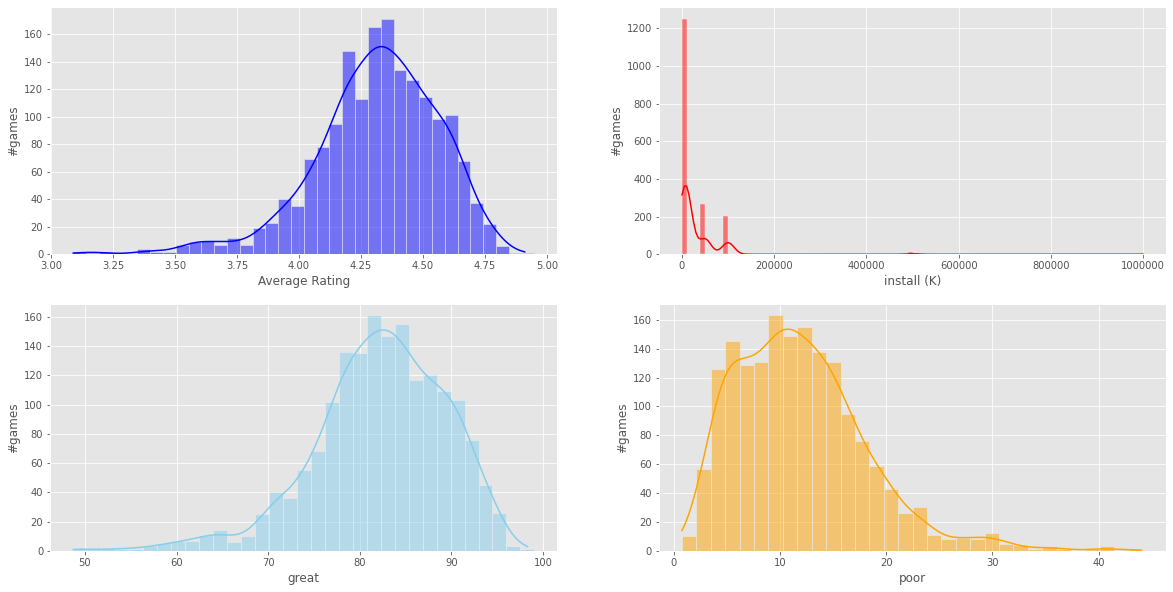

In [20]:
import seaborn as sns
average_rating_bins = 2*iqr[0]/(len(df['average_rating'])**(1/3))
average_rating_install_k = 2*iqr[1]/(len(df['install (K)'])**(1/3))
average_rating_great = 2*iqr[2]/(len(df['great'])**(1/3))
average_rating_poor = 2*iqr[3]/(len(df['poor'])**(1/3))
plt.figure(figsize=(20,10))
plt.subplot(221)
ax_1 = sns.histplot(data=df[["average_rating"]], x='average_rating',binwidth=average_rating_bins,color='blue',kde=True)
ax_1.set(xlabel='Average Rating', ylabel='#games')
plt.subplot(222)
ax_2 = sns.histplot(data=df[["install (K)"]], x='install (K)',binwidth=10000,color='red',kde=True)
ax_2.set(ylabel='#games')
plt.ticklabel_format(useOffset=False, style='plain')
plt.subplot(223)
ax_3 = sns.histplot(data=df[["great"]], x='great',binwidth=average_rating_great,color='skyblue',kde=True)
ax_3.set(ylabel='#games')
plt.subplot(224)
ax_4 = sns.histplot(data=df[["poor"]], x='poor',binwidth=average_rating_poor,color='orange',kde=True)
ax_4.set(ylabel='#games')
plt.plot()
plt.show()

In [22]:
df['install (K)'].value_counts().sort_values(ascending=False)

10000.0      795
50000.0      266
5000.0       248
100000.0     203
1000.0       191
500.0         13
500000.0      10
1000000.0      2
100.0          2
Name: install (K), dtype: int64

100.0          2
500.0         13
1000.0       191
5000.0       248
10000.0      795
50000.0      266
100000.0     203
500000.0      10
1000000.0      2
Name: install (K), dtype: int64


<AxesSubplot:>

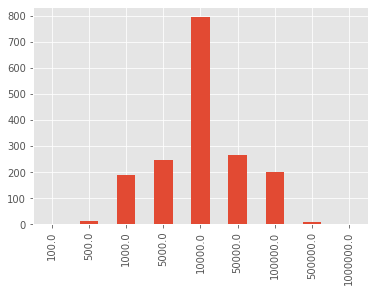

In [23]:
barplot = df["install (K)"].value_counts().sort_index()
print(barplot)
barplot.plot(kind="bar")
# fig, ax = plt.subplots()
# df.plot(ax=ax, kind='bar', xlabel="Install (K)", ylabel="Frequency")
# plt.show()

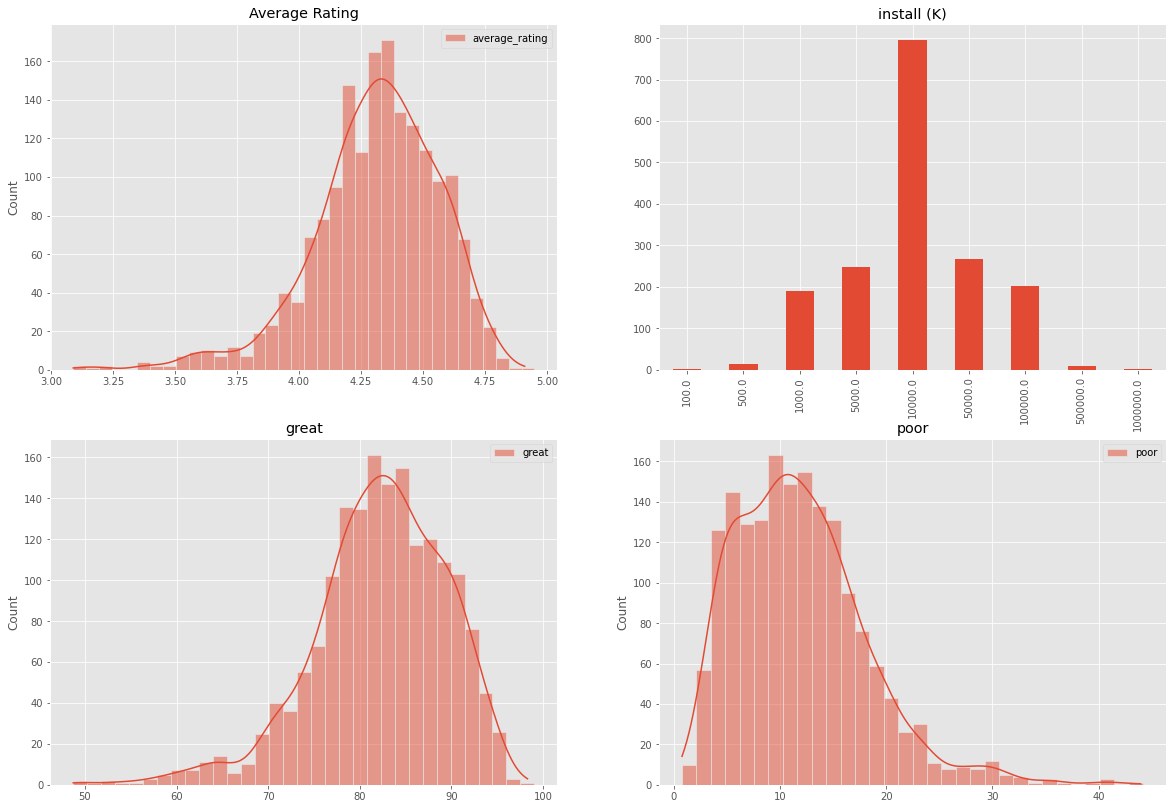

In [24]:
import seaborn as sns
average_rating_bins = 2*iqr[0]/(len(df['average_rating'])**(1/3))
average_rating_install_k = 2*iqr[1]/(len(df['install (K)'])**(1/3))
average_rating_great = 2*iqr[2]/(len(df['great'])**(1/3))
average_rating_poor = 2*iqr[3]/(len(df['poor'])**(1/3))
plt.figure(figsize=(20,14))
plt.subplot(221)
ax1 = sns.histplot(data=df[["average_rating"]],binwidth=average_rating_bins,color='blue',kde=True)
plt.title('Average Rating')
plt.subplot(222)
barplot.plot(kind="bar")
plt.title('install (K)')
plt.subplot(223)
ax2  = sns.histplot(data=df[["great"]], binwidth=average_rating_great,color='skyblue',kde=True)
plt.title('great')
plt.subplot(224)
ax3 = sns.histplot(data=df[["poor"]], binwidth=average_rating_poor,color='orange',kde=True)
plt.title('poor')
plt.plot()
plt.show()

## BoxPlot Data Parameter

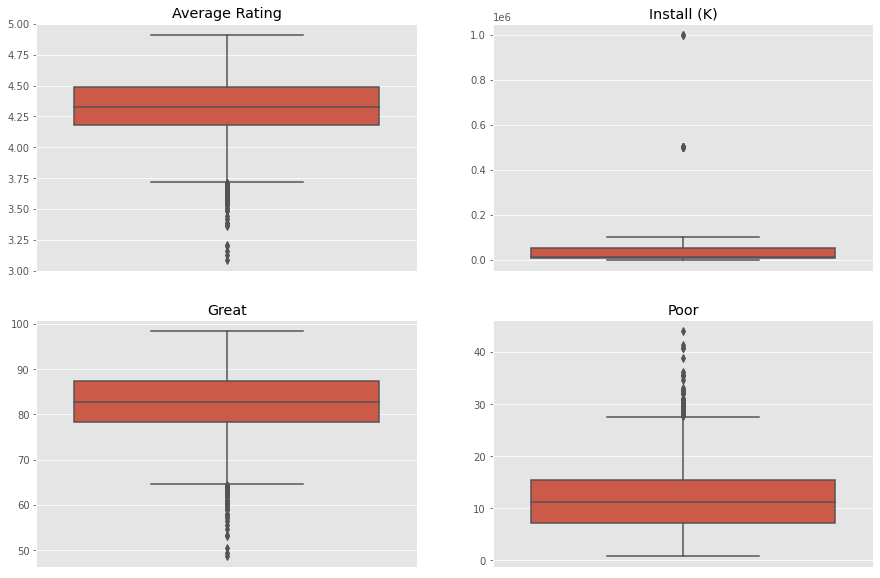

In [25]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.boxplot(data=df["average_rating"])
plt.title("Average Rating")
plt.xticks([])
plt.subplot(222)
sns.boxplot(data=df["install (K)"])
plt.title("Install (K)")
plt.xticks([])
plt.subplot(223)
sns.boxplot(data=df["great"])
plt.title("Great")
plt.xticks([])
plt.subplot(224)
sns.boxplot(data=df["poor"])
plt.title("Poor")
plt.xticks([])
plt.show()

# Mendeskripsikan perilaku data #averagerating berdasarkan kelompok category

## Menyimpan Rata-Rata average rating dari masing-masing kategori Game

In [26]:
average_rating_category_mean = df.groupby('category').mean()['average_rating'].sort_values(ascending=False)
average_rating_category_mean

category
GAME WORD            4.443585
GAME CASINO          4.437800
GAME CARD            4.421066
GAME PUZZLE          4.394200
GAME BOARD           4.347100
GAME CASUAL          4.335196
GAME SIMULATION      4.318200
GAME RACING          4.312000
GAME ARCADE          4.294900
GAME ROLE PLAYING    4.276000
GAME STRATEGY        4.265000
GAME ADVENTURE       4.264200
GAME SPORTS          4.261100
GAME EDUCATIONAL     4.253600
GAME ACTION          4.246100
GAME TRIVIA          4.245700
GAME MUSIC           4.180300
Name: average_rating, dtype: float64

## Membuat Histogram untuk perbandingan sebaran data #averagerating per kelompok category 

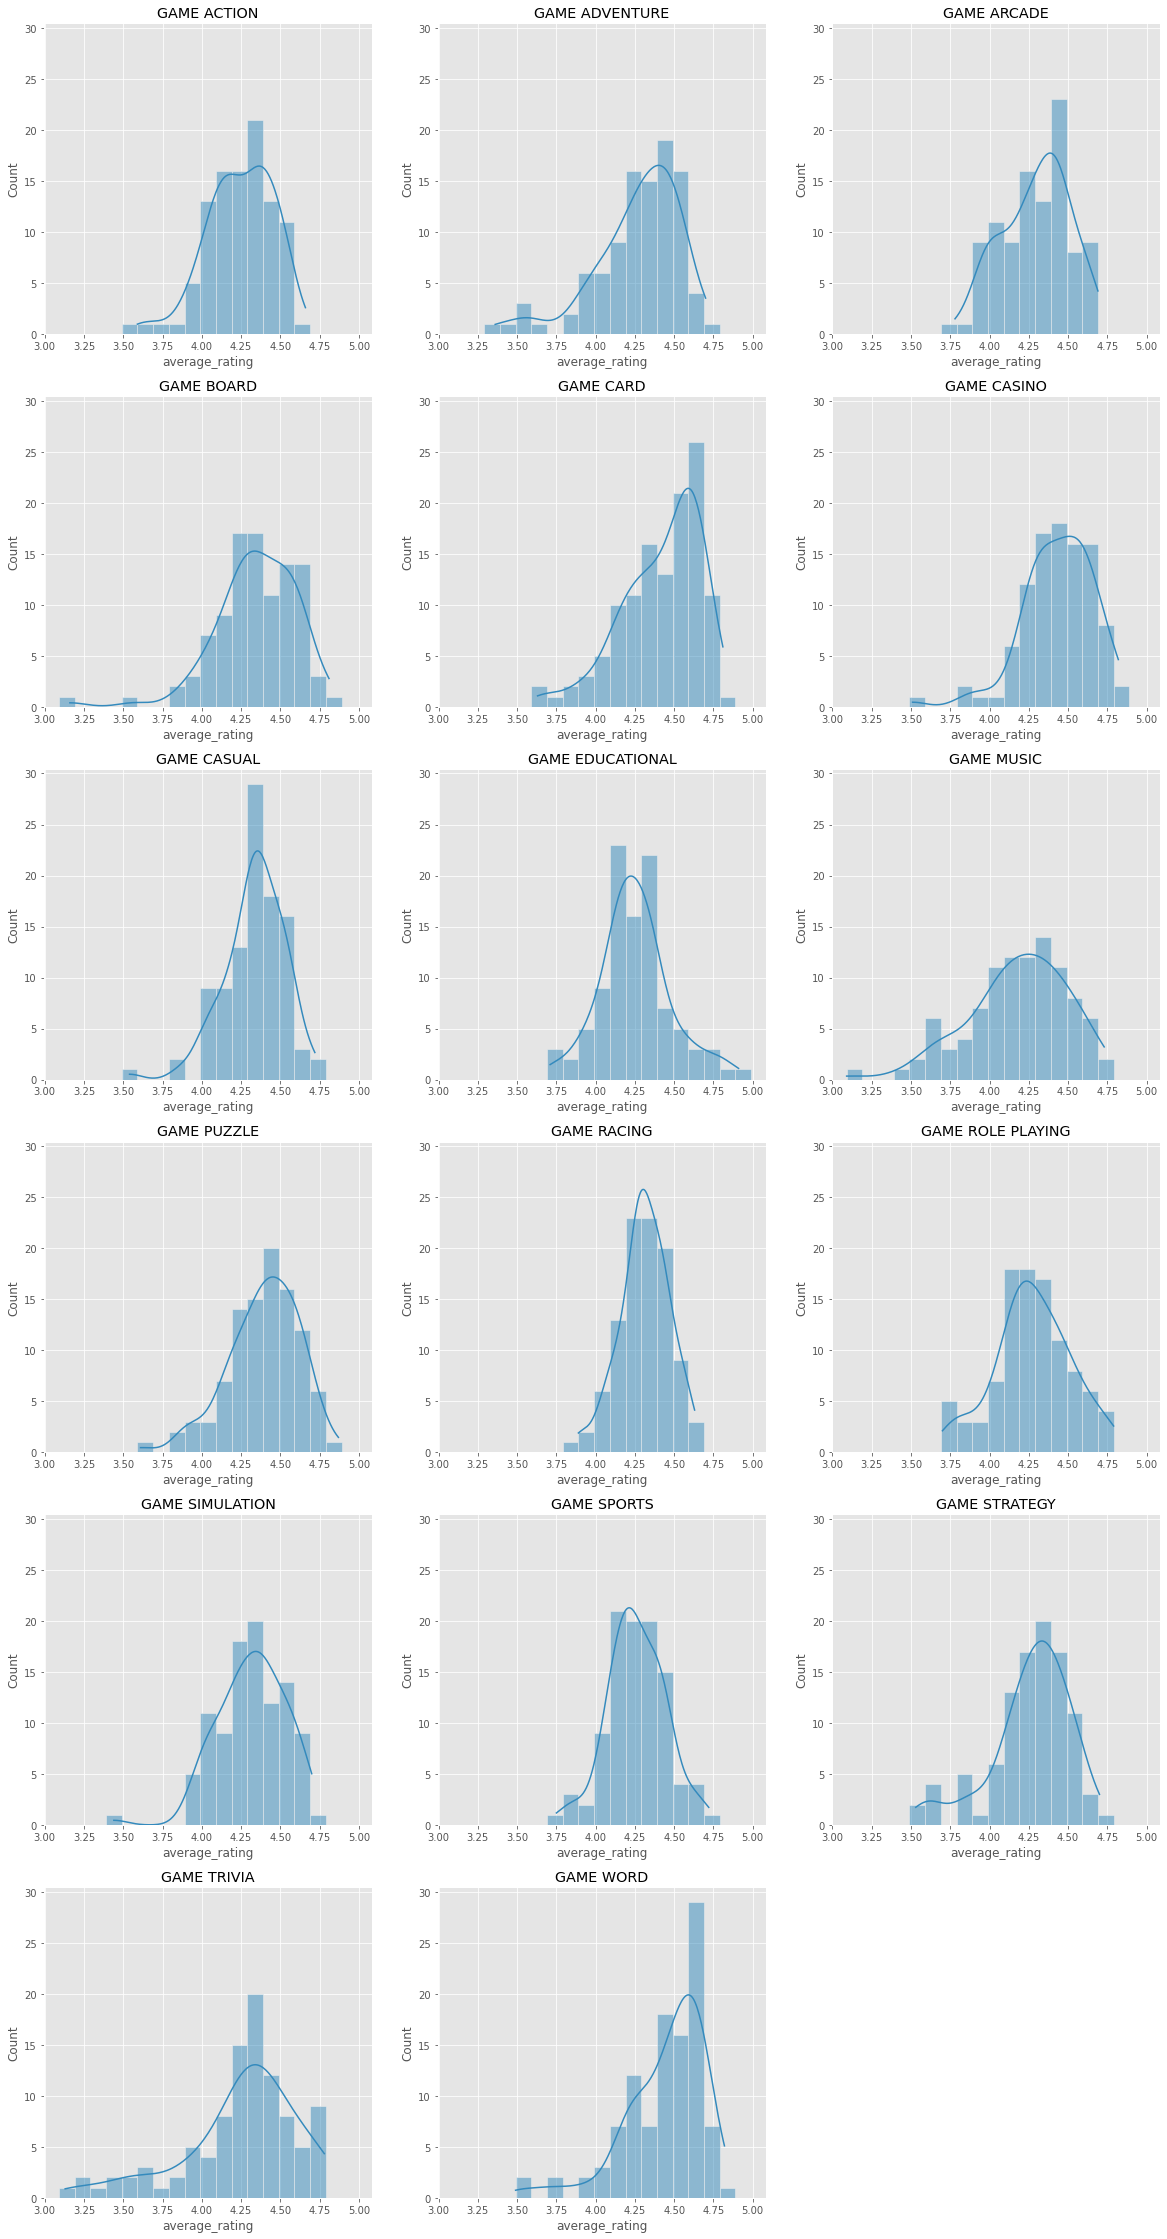

In [27]:
min_val = df["average_rating"].min()
max_val = df["average_rating"].max()
category_unique = df["category"].unique()
plt.figure(figsize = (20, 40))
ax = plt.subplot(6, 3, 1)
sns.histplot(data=df["average_rating"][(df["category"] == category_unique[0])], binrange=(min_val,max_val), binwidth=0.1,kde=True)
plt.title(category_unique[0])
for i in range(1, len(category_unique)):
    plt.subplot(6, 3, i+1, sharey= ax)
    sns.histplot(data=df["average_rating"][(df["category"] == category_unique[i])], binrange=(min_val,max_val), binwidth=0.1,kde=True)
    plt.title(category_unique[i])

## Membuat boxplot untuk perbandingan sebaran data #averagerating per kelompok category

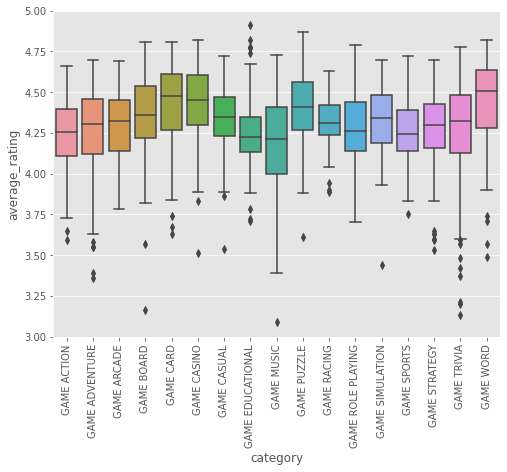

In [28]:
plt.figure(figsize=(8, 6)) #width=8, height=6
g = sns.boxplot(data=df, x="category", y="average_rating")
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [29]:
df

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


In [30]:
game_fav = df.sort_values(["average_rating","install (K)","great"],ascending=False)[:int(len(df)//1000)+1]
game_fav

,title,average_rating,install (K),great,poor,category
741,超級單字王 - 英檢、多益、托福 輕鬆學,4.91,500.0,98.294662,0.795315,GAME EDUCATIONAL
956,Indy Cat for VK,4.87,5000.0,96.860754,2.073848,GAME PUZZLE


In [31]:
2 / len(df) * 100

0.11560693641618498

In [32]:


avg_great = sum(df["great"])//len(df["great"])
avg_poor = sum(df["poor"])//len(df["poor"])
avg_install = sum(df["install (K)"])//len(df["install (K)"])
avg_average_rating = sum(df["average_rating"])//len(df["average_rating"])
print(avg_great)
print(avg_poor)
print(avg_install)
print(avg_average_rating)
optimal = df[(df["average_rating"]>avg_average_rating)&(df["install (K)"]>avg_install)& (df["great"]>avg_great)& (df["poor"]<avg_poor)]
optimal

82.0
11.0
28894.0
4.0


,title,average_rating,install (K),great,poor,category
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
5,Shadow Fight 2,4.57,100000.0,88.932543,7.877291,GAME ACTION
6,Call of Duty®: Mobile - Day of Reckoning,4.47,100000.0,86.713925,9.535770,GAME ACTION
13,Bowmasters,4.55,100000.0,88.369050,7.512608,GAME ACTION
14,Standoff 2,4.54,50000.0,88.545310,8.674666,GAME ACTION
...,...,...,...,...,...,...
1640,Word search,4.46,50000.0,87.025636,5.443702,GAME WORD
1647,Word Link,4.39,50000.0,84.453210,10.190417,GAME WORD
1660,Word Search,4.46,50000.0,92.804826,3.958146,GAME WORD
1661,Word Search,4.46,50000.0,82.270377,8.873481,GAME WORD


In [33]:
# estimation_table = pd.DataFrame({"jenis" : ["average_rating", "install (K)", "estimation"],
#               "jumlah pencilan" : [len(pencilan_avg_rt), len(pencilan_install), len(pencilan_great), len(pencilan_poor)],
#               "pencilan" : [sorted(list(set(pencilan_avg_rt))), sorted(list(set(pencilan_install))), sorted(list(set(pencilan_great))), sorted(list(set(pencilan_poor)))]
#               })-
df

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


In [34]:
estimation_table = df.sort_values(["average_rating","install (K)","great"],ascending=False)
estimation_table

,title,average_rating,install (K),great,poor,category
741,超級單字王 - 英檢、多益、托福 輕鬆學,4.91,500.0,98.294662,0.795315,GAME EDUCATIONAL
956,Indy Cat for VK,4.87,5000.0,96.860754,2.073848,GAME PUZZLE
1658,Word Collect - Free Word Games,4.82,10000.0,95.865456,3.051541,GAME WORD
575,Free Slot Machines with Bonus Games!,4.82,5000.0,95.405214,2.715167,GAME CASINO
813,Английский для Начинающих: LinDuo HD,4.82,1000.0,97.007236,1.602564,GAME EDUCATIONAL
...,...,...,...,...,...,...
1592,NEW QuizDuel!,3.21,1000.0,55.696434,38.859645,GAME TRIVIA
1606,TopQuiz -Play Quiz & Lottery | Win Money via P...,3.20,1000.0,53.296274,41.306520,GAME TRIVIA
304,모두의마블,3.16,10000.0,50.405479,40.749019,GAME BOARD
1590,스케치퀴즈,3.13,5000.0,48.731953,40.680957,GAME TRIVIA
